# Exploration of Results
Orion Junkins
Sepember 6, 2024

## Setup and Imports
Define needed filepaths and import needed utilities

In [1]:
import os
import numpy as np

from results_exploration_helpers import *

root = "/Volumes/eeg"

channel_names = np.load(os.path.join(root, "channel_names.npy"))
freqs = np.load(os.path.join(root, "freqs.npy"))

ICA_COMPS = 0.9999
root = "/Volumes/eeg"
connectivity_dir = os.path.join(root, "connectivity_scores")
expert_dir = os.path.join(connectivity_dir, "expert")
novice_dir = os.path.join(connectivity_dir, "novice")

## Average Delta Connectivity for a Single Subject
All pre-processing and calculation of needed connectivity matrices is complete, but a more calculation is required to turn these raw connectivity metrics into meaningful results. Connectivity data are stored in ".npy" files as 3 dimensional matrices. 

Lets load all of the data for expert 5b, and inspect the shape of the Baseline No Gesture array.

In [2]:
BL_NoG_data, BL_WiG_data, NoG_data, WiG_data = load_single_connectivity(expert_dir, "9b", preserved_epochs=True)

BL_NoG_data.shape

(41, 12, 12, 24)

In [3]:
BL_NoG_delta_avg = average_single_over_freq_range(BL_NoG_data, freqs, 0.5, 4)
BL_WiG_delta_avg = average_single_over_freq_range(BL_WiG_data, freqs, 0.5, 4)
NoG_delta_avg = average_single_over_freq_range(NoG_data, freqs, 0.5, 4)
WiG_delta_avg = average_single_over_freq_range(WiG_data, freqs, 0.5, 4)

## Extending to Multiple Subjects

Lets know look at multiple subjects, starting first with experts. 

In [4]:
all_expert_BL_NoG, all_expert_BL_WiG, all_expert_NoG, all_expert_WiG = load_all_connectivity(expert_dir, preserved_epochs=True)

Skipping 5b due to missing files
Loaded 9b
Loaded 10b
Skipping 10c1 due to missing files
Skipping 7c due to missing files
Skipping 6 due to missing files
Skipping 11 due to missing files
Skipping 8 due to missing files
Skipping 5c due to missing files
Skipping 10c2 due to missing files
Skipping 11c due to missing files
Skipping 22 due to missing files
Skipping 12 due to missing files
Skipping 13b due to missing files
Skipping 17 due to missing files
Skipping 20 due to missing files


In [9]:
all_expert_BL_NoG_delta_avg = average_all_over_freq_range(all_expert_BL_NoG, freqs, 0.5, 4)
all_expert_BL_WiG_delta_avg = average_all_over_freq_range(all_expert_BL_WiG, freqs, 0.5, 4)
all_expert_NoG_delta_avg = average_all_over_freq_range(all_expert_NoG, freqs, 0.5, 4)
all_expert_WiG_delta_avg = average_all_over_freq_range(all_expert_WiG, freqs, 0.5, 4)

print("Shape of all_expert_BL_NoG_delta_avg: ", all_expert_BL_NoG_delta_avg.shape)

Shape of all_expert_BL_NoG_delta_avg:  (81, 12, 12)


In [32]:
all_novice_BL_NoG, all_novice_BL_WiG, all_novice_NoG, all_novice_WiG = load_all_connectivity(novice_dir, preserved_epochs=True)
all_novice_BL_NoG_delta_avg = average_all_over_freq_range(all_novice_BL_NoG, freqs, 0.5, 4)    
all_novice_BL_WiG_delta_avg = average_all_over_freq_range(all_novice_BL_WiG, freqs, 0.5, 4)
all_novice_NoG_delta_avg = average_all_over_freq_range(all_novice_NoG, freqs, 0.5, 4)
all_novice_WiG_delta_avg = average_all_over_freq_range(all_novice_WiG, freqs, 0.5, 4)

Loaded 5b
Skipping 6 due to missing files
Loaded 6c
Loaded 8c
Loaded 9c
Loaded 14
Loaded 15b
Loaded 17b


## Calculate Statistics
This section calculates mean and standard deviation for each subset enabling group comparison. This section also performs T tests to calculate the p-value for each electrode pair to determine the significance of the group differences. 

To simplify we will ignore gestures for now.

In [33]:
all_novice_BL = np.concatenate((all_novice_BL_NoG_delta_avg, all_novice_BL_WiG_delta_avg), axis=0)
all_novice_non_BL = np.concatenate((all_novice_NoG_delta_avg, all_novice_WiG_delta_avg), axis=0)

all_expert_BL = np.concatenate((all_expert_BL_NoG_delta_avg, all_expert_BL_WiG_delta_avg), axis=0)
all_expert_non_BL = np.concatenate((all_expert_NoG_delta_avg, all_expert_WiG_delta_avg), axis=0)


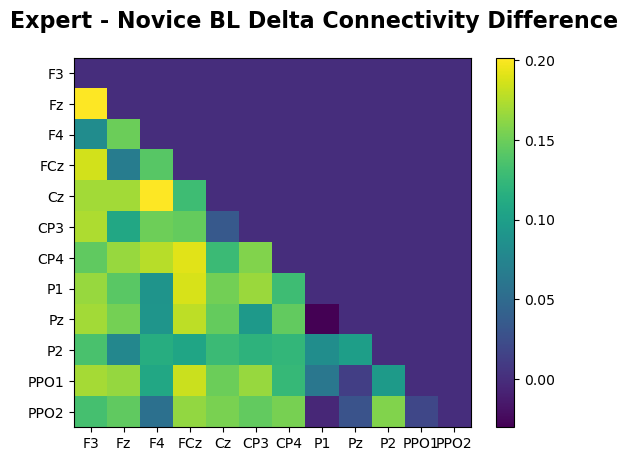

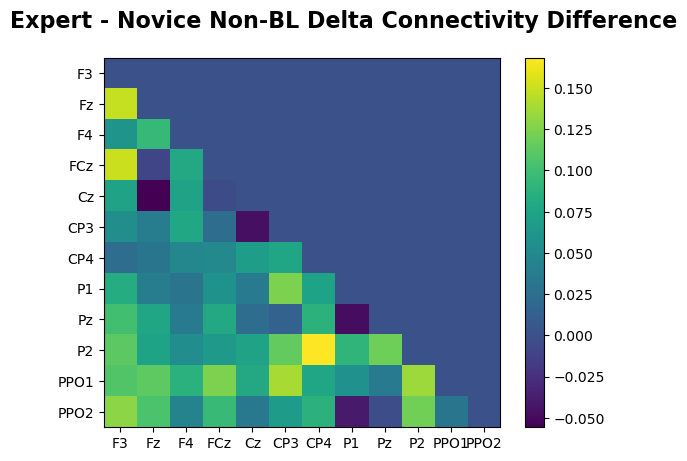

In [34]:
group_mean_novice_BL = np.mean(all_novice_BL, axis=0)
group_mean_novice_non_BL = np.mean(all_novice_non_BL, axis=0)

group_mean_expert_BL = np.mean(all_expert_BL, axis=0)
group_mean_expert_non_BL = np.mean(all_expert_non_BL, axis=0)

BL_difference = group_mean_expert_BL - group_mean_novice_BL
non_BL_difference = group_mean_expert_non_BL - group_mean_novice_non_BL

plot_single_connectivity(BL_difference, channel_names, "Expert - Novice BL Delta Connectivity Difference")
plot_single_connectivity(non_BL_difference, channel_names, "Expert - Novice Non-BL Delta Connectivity Difference")

In [35]:
from scipy.stats import ttest_ind

def get_element_wise_p_values(expert_data, novice_data):
    p_values = np.zeros((expert_data.shape[1], expert_data.shape[2]))
    for i in range(expert_data.shape[1]):
        for j in range(expert_data.shape[2]):
            expert = expert_data[:, i, j]
            novice = novice_data[:, i, j]
            t_stat, p_value = ttest_ind(expert, novice)
            p_values[i, j] = p_value
    return p_values

In [36]:
BL_p_values = get_element_wise_p_values(all_expert_BL, all_novice_BL)
non_BL_p_values = get_element_wise_p_values(all_expert_non_BL, all_novice_non_BL)

plot_single_connectivity(BL_p_values, channel_names, "Expert - Novice BL Delta Connectivity P-Values")
plot_single_connectivity(non_BL_p_values, channel_names, "Expert - Novice Non-BL Delta Connectivity P-Values")

KeyboardInterrupt: 

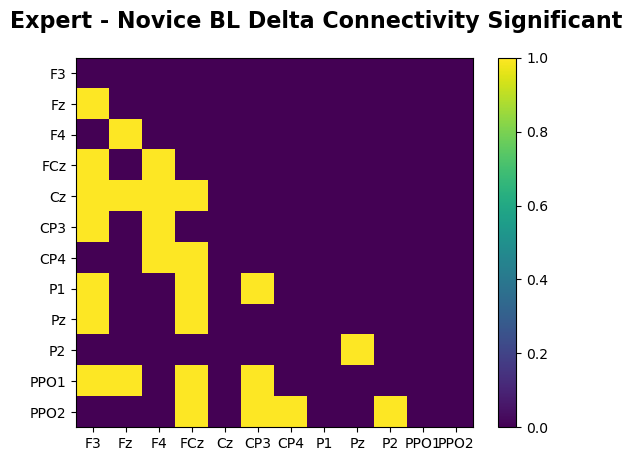

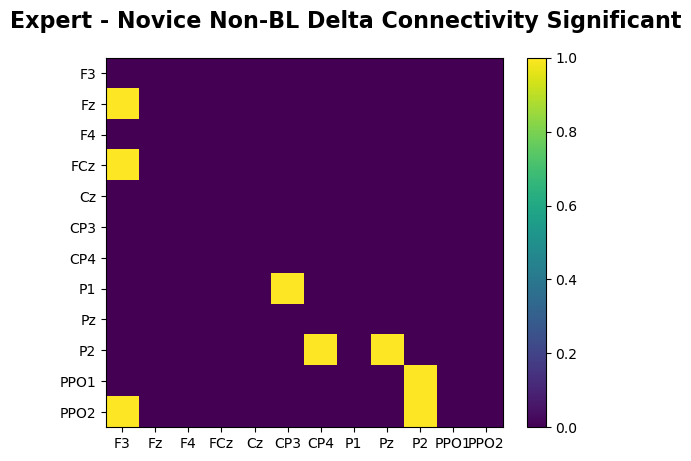

In [20]:
significant_BL = BL_p_values < 0.05
significant_non_BL = non_BL_p_values < 0.05

plot_single_connectivity(significant_BL, channel_names, "Expert - Novice BL Delta Connectivity Significant")
plot_single_connectivity(significant_non_BL, channel_names, "Expert - Novice Non-BL Delta Connectivity Significant")